## Importing Libraries 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"Churn_Modelling.csv")

In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

## ANN-classifier algo building 

In [8]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [14]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [19]:
model = Sequential()

model.add(Dense(15,activation='sigmoid',input_dim=11))#input layer
model.add(Dense(11,activation='sigmoid'))#hidden layer
model.add(Dense(1,activation='sigmoid'))#output layer

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.5547 - accuracy: 0.7942 - val_loss: 0.5071 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.4994 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7958 - val_loss: 0.4972 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7958 - val_loss: 0.4958 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7958 - val_loss: 0.4957 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7958 - val_loss: 0.4953 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969

In [23]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [24]:
y_pred

array([[0.2375291 ],
       [0.2375291 ],
       [0.2375291 ],
       ...,
       [0.2375291 ],
       [0.23178042],
       [0.2375291 ]], dtype=float32)

In [27]:
y_pred = y_pred.argmax(axis=-1)
accuracy_score(y_test,y_pred)

0.7975

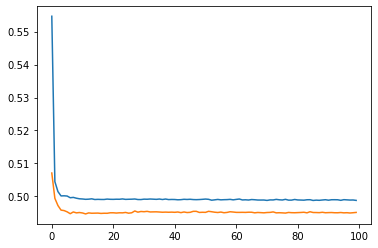

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

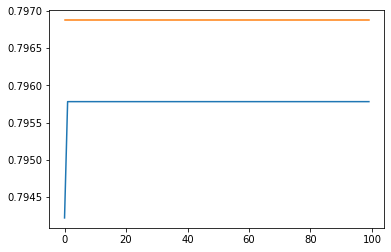

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])